In [389]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from matplotlib.backends.backend_pdf import PdfPages 

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor

from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor

from sklearn.neural_network import MLPRegressor

from numpy import loadtxt
from sklearn.ensemble import GradientBoostingRegressor as gBR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
import gmplot
import gmaps
import time, datetime
%matplotlib inline

In [390]:
def date_from_line(line):
    """returns DDMMYYYY from line in data file"""
    if int(line['Day'])<10:
        day='0'+str(line['Day'])
    else:
        day=str(line['Day'])
    if int(line[1])<10:
        month='0'+str(line['Month'])
    else:
        month=str(line['Month'])
    return day+month+str(line['Year'])

# USING ROUTE 00010001 DATA ONLY, 2 months

In [391]:
print(os.getcwd())
df=pd.read_csv('new_model_data_00010001.csv')
df.head(10)

C:\Users\Cara\Documents\COMPSCI\1A_PRACTICUM\Notebooks


,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),Visibility (km),Wind Speed (km/h),Cumulative Time Taken,StopSeq
0,2012,11,6,8,59,2,1,1352192342,10001,5461,226,7,10,29.6,0,0
1,2012,11,6,9,4,41,1,1352192681,10001,5461,231,8,10,31.5,339,5
2,2012,11,6,9,6,22,1,1352192782,10001,5461,1641,8,10,31.5,440,6
3,2012,11,6,9,7,58,1,1352192878,10001,5461,1642,8,10,31.5,536,7
4,2012,11,6,9,15,42,1,1352193342,10001,5461,47,8,10,31.5,1000,15
5,2012,11,6,9,18,1,1,1352193481,10001,5461,49,7,10,27.8,1139,17
6,2012,11,6,9,19,42,1,1352193582,10001,5461,51,7,10,27.8,1240,19
7,2012,11,6,9,22,21,1,1352193741,10001,5461,265,7,10,27.8,1399,21
8,2012,11,6,9,24,43,1,1352193883,10001,5461,271,7,10,27.8,1541,22
9,2012,11,6,9,29,2,1,1352194142,10001,5461,340,7,10,27.8,1800,23


# Add stop sequence feature to order stops in each route 

In [392]:
#order sequence sourced from files available on dublinked site
stops_ordered = [226, 228, 229, 227, 230, 231, 1641, 1642, 213, 214, 4432, 119, 44, 45, 46, 47, 48, 49, 50, 51, 52, 265, 271, 340, 350, 351, 352, 353, 354, 355, 356, 357, 390, 372, 373, 374, 375, 2804, 376, 377, 378, 380]
stops_order = {}
for i in range(len(stops_ordered)):
    stops_order[stops_ordered[i]] = (i)

In [393]:
#for key in stops_order:
    #print(key, stops_order[key])

In [394]:
#REVIEW SLICES OF DATASET
# #sunday 11th, nov
# dfSun = df.loc[df['WeekDay']==6]
# dfSunN = dfSun.loc[dfSun['Month']==11]
# dfSunOneWeekN = dfSunN.loc[(dfSunN['Day'] == 11)] 
# dfSunOneWeekN['StopSeq'] = 0

In [395]:
#add related stop sequencce value to new column
for item, row in df.iterrows():
    for key, value in stops_order.items():
        if row['StopID'] == key:
            df.set_value(item, 'StopSeq', value)
df['StopSeq'] = df['StopSeq'].astype(int)

In [396]:
df.head(3)

,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),Visibility (km),Wind Speed (km/h),Cumulative Time Taken,StopSeq
0,2012,11,6,8,59,2,1,1352192342,10001,5461,226,7,10,29.6,0,0
1,2012,11,6,9,4,41,1,1352192681,10001,5461,231,8,10,31.5,339,5
2,2012,11,6,9,6,22,1,1352192782,10001,5461,1641,8,10,31.5,440,6


LIST OF INITIAL COLUNM FEATURES

In [397]:
col_list = list(df)
col_list

['Year',
 'Month',
 'Day',
 'Hours',
 'Minute',
 'Second',
 'WeekDay',
 'Timestamp',
 'JourneyPatternID',
 'VehicleJourneyID',
 'StopID',
 'Temperature (C)',
 'Visibility (km)',
 'Wind Speed (km/h)',
 'Cumulative Time Taken',
 'StopSeq']

In [398]:
#run once per session, swappint CTT and stop seq
# col_list = list(df)
# col_list[14], col_list[15] = col_list[15], col_list[14]
# df.columns = col_list
# df.head(3)

INITIAL DATA TYPES

In [399]:
df.dtypes

Year                      int64
Month                     int64
Day                       int64
Hours                     int64
Minute                    int64
Second                    int64
WeekDay                   int64
Timestamp                 int64
JourneyPatternID          int64
VehicleJourneyID          int64
StopID                    int64
Temperature (C)           int64
Visibility (km)          object
Wind Speed (km/h)        object
Cumulative Time Taken     int64
StopSeq                   int32
dtype: object

In [400]:
df.shape

(29527, 16)

In [401]:
df['StopSeq'] = df['StopSeq'].astype(int)

In [402]:
#remove lines with Calm in windspeed
#remove lines with '-' in visibility
#proceed with feature use

# count = 0
# for item, row in df.iterrows():
#     if row['Wind Speed (km/h)']=="Calm":
#         print(row['Wind Speed (km/h)'], count, type(row['Wind Speed (km/h)']))
#         count+=1
#         del row
#     else:
#         continue

#delete lines of incorrect values in windspeed, visibility features

# REVIEW COLUMNS, UNIQUE VALUES AND THEIR COUNTS

In [403]:
for col_name in df:
    print(col_name, "\n", df[col_name].unique(), "\n", "number of unique values:", len(df[col_name].unique()), "\n", df[col_name].value_counts(), "\n")

Year 
 [2012 2013] 
 number of unique values: 2 
 2013    16091
2012    13436
Name: Year, dtype: int64 

Month 
 [11  1] 
 number of unique values: 2 
 1     16091
11    13436
Name: Month, dtype: int64 

Day 
 [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
  1  2  3  4  5 31] 
 number of unique values: 31 
 8     1416
22    1290
7     1281
14    1268
26    1252
21    1213
15    1200
19    1149
16    1147
9     1126
29    1107
23    1097
17    1093
10    1073
12    1041
28    1035
6     1020
13    1007
27     974
24     919
20     916
11     857
18     829
25     797
3      710
4      705
30     572
2      563
5      491
1      278
31     101
Name: Day, dtype: int64 

Hours 
 [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  7] 
 number of unique values: 17 
 12    2856
11    2768
13    2764
14    2716
16    2384
15    2335
10    2330
17    2137
9     1813
18    1725
20    1435
19    1351
21    1241
22    1029
23     563
8       79
7        1
Name: Hours, dt

In [404]:
dfMon = df.loc[df['WeekDay']==0]
dfMonN = dfMon.loc[dfMon['Month']==11]
dfMonN.head(5)
# dfMonNVJ = dfMonN.loc[dfMonN['VehicleJourneyID'==5461]]
# dfMonNVJ.head(5)

,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),Visibility (km),Wind Speed (km/h),Cumulative Time Taken,StopSeq
3319,2012,11,12,9,0,47,0,1352710847,10001,5461,226,12,10,25.9,0,0
3320,2012,11,12,9,1,48,0,1352710908,10001,5461,228,12,10,25.9,61,1
3321,2012,11,12,9,2,25,0,1352710945,10001,5461,229,12,10,25.9,98,2
3322,2012,11,12,9,3,46,0,1352711026,10001,5461,227,12,10,25.9,179,3
3323,2012,11,12,9,4,27,0,1352711067,10001,5461,230,12,10,25.9,220,4


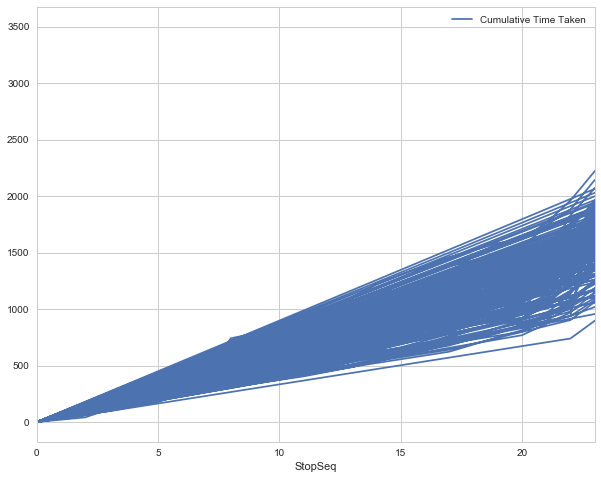

In [405]:
#Mon, 12th, Nov, 2011, route 1, 
#this graph was cleaned by applying averages to stops that were not recorded at the start 
#of a trip i.e. where the first stop recorded was stop 4, averages were applied to the CTT column of stops 0-3, 
#this did not impact averages overall (Conor did this and applied it to the latest working set of CSVs) 

#dfMonNVJ.plot(kind='line', x='StopSeq', y='Cumulative Time Taken', figsize=(10, 8))
dfMonN.plot(kind='line', x='StopSeq', y='Cumulative Time Taken', figsize=(10, 8))

# MODEL IMPLEMENTATION SECTION: RFR, GRADIENT, BAGGING, ADABOOST 

In [406]:
#REFERENCE: https://www.kaggle.com/olgabelitskaya/regressors
# Formatted scoring function taken from this Kaggle kernel

In [407]:
def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    """return various error metrics of models' predictions for model evaluation"""
    regressor_list.append(str(regressor))
    
    ev_train_c = explained_variance_score(y_train, y_train_reg)
    ev_train.append(ev_train_c)
    ev_test_c = explained_variance_score(y_test, y_test_reg)
    ev_test.append(ev_test_c)
    
    r2_train_c = r2_score(y_train, y_train_reg)
    r2_train.append(r2_train_c)
    r2_test_c = r2_score(y_test, y_test_reg)
    r2_test.append(r2_test_c)
    
    mse_train_c = mean_squared_error(y_train, y_train_reg)
    mse_train.append(mse_train_c)
    mse_test_c = mean_squared_error(y_test, y_test_reg)
    mse_test.append(mse_test_c)

    mae_train_c = mean_absolute_error(y_train, y_train_reg)
    mae_train.append(mae_train_c)
    mae_test_c = mean_absolute_error(y_test, y_test_reg)
    mae_test.append(mae_test_c)  
    
    mdae_train_c = median_absolute_error(y_train, y_train_reg)
    mdae_train.append(mdae_train_c)
    mdae_test_c = median_absolute_error(y_test, y_test_reg)
    mdae_test.append(mdae_test_c)
    
    print("______________________________________________________________________________")
    print(str(regressor))
    print("______________________________________________________________________________")
    print("EV score. Train: ", ev_train_c)
    print("EV score. Test: ", ev_test_c)
    print("---------")
    print("R2 score. Train: ", r2_train_c)
    print("R2 score. Test: ", r2_test_c)
    print("---------")
    print("MSE score. Train: ", mse_train_c)
    print("MSE score. Test: ", mse_test_c)
    print("---------")
    print("MAE score. Train: ", mae_train_c)
    print("MAE score. Test: ", mae_test_c)
    print("---------")
    print("MdAE score. Train: ", mdae_train_c)
    print("MdAE score. Test: ", mdae_test_c)

In [408]:
print(os.getcwd()) 
X = df
X.head(3)

C:\Users\Cara\Documents\COMPSCI\1A_PRACTICUM\Notebooks


,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),Visibility (km),Wind Speed (km/h),Cumulative Time Taken,StopSeq
0,2012,11,6,8,59,2,1,1352192342,10001,5461,226,7,10,29.6,0,0
1,2012,11,6,9,4,41,1,1352192681,10001,5461,231,8,10,31.5,339,5
2,2012,11,6,9,6,22,1,1352192782,10001,5461,1641,8,10,31.5,440,6


In [409]:
cols = X.columns.tolist()

In [410]:
cols

['Year',
 'Month',
 'Day',
 'Hours',
 'Minute',
 'Second',
 'WeekDay',
 'Timestamp',
 'JourneyPatternID',
 'VehicleJourneyID',
 'StopID',
 'Temperature (C)',
 'Visibility (km)',
 'Wind Speed (km/h)',
 'Cumulative Time Taken',
 'StopSeq']

In [411]:
# set CTT as last column, ['Year','Month',
# 'Day', 'Hours', 'Minute', 'Second', 'WeekDay', 'Timestamp',
# 'JourneyPatternID', 'VehicleJourneyID', 'StopID', 'Temperature (C)', 'Visibility (km)', 'StopSeq', 'Cumulative Time Taken']

#REORDER COLUMNS, TARGET FEATURE AS LAST COL TO MAKE DF SLICING FOR COORELATION SECTION SIMPLER
cols = cols[:14] + cols[-1:] + cols[-2:-1] #RUN ONCE
cols

['Year',
 'Month',
 'Day',
 'Hours',
 'Minute',
 'Second',
 'WeekDay',
 'Timestamp',
 'JourneyPatternID',
 'VehicleJourneyID',
 'StopID',
 'Temperature (C)',
 'Visibility (km)',
 'Wind Speed (km/h)',
 'StopSeq',
 'Cumulative Time Taken']

In [412]:
X = X[cols]

In [413]:
X.shape

(29527, 16)

In [414]:
X.dtypes

Year                      int64
Month                     int64
Day                       int64
Hours                     int64
Minute                    int64
Second                    int64
WeekDay                   int64
Timestamp                 int64
JourneyPatternID          int64
VehicleJourneyID          int64
StopID                    int64
Temperature (C)           int64
Visibility (km)          object
Wind Speed (km/h)        object
StopSeq                   int32
Cumulative Time Taken     int64
dtype: object

In [415]:
X.head(3)

,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),Visibility (km),Wind Speed (km/h),StopSeq,Cumulative Time Taken
0,2012,11,6,8,59,2,1,1352192342,10001,5461,226,7,10,29.6,0,0
1,2012,11,6,9,4,41,1,1352192681,10001,5461,231,8,10,31.5,5,339
2,2012,11,6,9,6,22,1,1352192782,10001,5461,1641,8,10,31.5,6,440


Feature selection
drop minute, second, timestamp, jpid as features
visibility and wind speed need to be corrected, are holding invalid entries, 'Calm' and '-'
separate CTT from features as y or target feature

In [416]:
X.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,29527,NaN,NaN,NaN,2012.54,0.497983,2012,2012,2013,2013,2013
Month,29527,NaN,NaN,NaN,5.55041,4.97983,1,1,1,11,11
Day,29527,NaN,NaN,NaN,16.2612,8.00646,1,9,16,23,31
Hours,29527,NaN,NaN,NaN,14.7491,3.79143,7,12,14,17,23
Minute,29527,NaN,NaN,NaN,28.601,17.427,0,14,29,43,59
Second,29527,NaN,NaN,NaN,27.3912,16.8702,0,10,27,44,59
WeekDay,29527,NaN,NaN,NaN,2.65496,1.85128,0,1,3,4,6
Timestamp,29527,NaN,NaN,NaN,1.35597e+09,2.62801e+06,1.35219e+09,1.35332e+09,1.35723e+09,1.35837e+09,1.35963e+09
JourneyPatternID,29527,NaN,NaN,NaN,10001,0,10001,10001,10001,10001,10001
VehicleJourneyID,29527,NaN,NaN,NaN,6625.3,3536.16,4608,4667,4811,5500,16392


In [417]:
X.isnull().sum() #no null values in set

Year                     0
Month                    0
Day                      0
Hours                    0
Minute                   0
Second                   0
WeekDay                  0
Timestamp                0
JourneyPatternID         0
VehicleJourneyID         0
StopID                   0
Temperature (C)          0
Visibility (km)          0
Wind Speed (km/h)        0
StopSeq                  0
Cumulative Time Taken    0
dtype: int64

# Set data types for features, group by numeric, categorical

In [418]:
X['VehicleJourneyID'] = X['VehicleJourneyID'].astype('category')

In [419]:
X['WeekDay'] = X['WeekDay'].astype('category')

In [420]:
X['StopID'] = X['StopID'].astype('category')

In [421]:
X['Month'] = X['Month'].astype('category')

In [422]:
X['Year'] = X['Year'].astype('category')

In [423]:
X['Hours'] = X['Hours'].astype('category')

In [424]:
X.head(3)

,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),Visibility (km),Wind Speed (km/h),StopSeq,Cumulative Time Taken
0,2012,11,6,8,59,2,1,1352192342,10001,5461,226,7,10,29.6,0,0
1,2012,11,6,9,4,41,1,1352192681,10001,5461,231,8,10,31.5,5,339
2,2012,11,6,9,6,22,1,1352192782,10001,5461,1641,8,10,31.5,6,440


In [425]:
X.dtypes

Year                     category
Month                    category
Day                         int64
Hours                    category
Minute                      int64
Second                      int64
WeekDay                  category
Timestamp                   int64
JourneyPatternID            int64
VehicleJourneyID         category
StopID                   category
Temperature (C)             int64
Visibility (km)            object
Wind Speed (km/h)          object
StopSeq                     int32
Cumulative Time Taken       int64
dtype: object

# CREATING NUMERIC AND CATEGORICAL FEATURE LISTS

Initial features reduced after Pearson Correlation

In [426]:
# numeric_variables = ['Day','Minute', 'Second', 'Timestamp', 'Temperature (C)', 'StopSeq', 'Cumulative Time Taken']
# X[numeric_variables].head(3)

In [427]:
categorical_variables = list(X.dtypes[(X.dtypes == "category")].index.values)
X[categorical_variables].head()

,Year,Month,Hours,WeekDay,VehicleJourneyID,StopID
0,2012,11,8,1,5461,226
1,2012,11,9,1,5461,231
2,2012,11,9,1,5461,1641
3,2012,11,9,1,5461,1642
4,2012,11,9,1,5461,47


In [428]:
features = categorical_variables + numeric_variables 
X[features].head(5)

,Year,Month,Hours,WeekDay,VehicleJourneyID,StopID,StopSeq
0,2012,11,8,1,5461,226,0
1,2012,11,9,1,5461,231,5
2,2012,11,9,1,5461,1641,6
3,2012,11,9,1,5461,1642,7
4,2012,11,9,1,5461,47,15


In [429]:
# Factorize categorical features
X_categ_list = X.dtypes[X.dtypes=='category'].index.values.tolist()
print(X_categ_list)

['Year', 'Month', 'Hours', 'WeekDay', 'VehicleJourneyID', 'StopID']


In [430]:
#factorialise categorical features of X
for element in categorical_variables:
    X_categories = pd.factorize(X[element])
    #test_categories = pd.factorize(test[element])
    X[element] = X_categories[0]
    #test[element] = test_categories[0]


In [431]:
#not used
# float_list = test.dtypes[test.dtypes == 'float64'].index.values.tolist()
# print(float_list)
# for element in float_list:
#     test[element] = test[element].astype(int)

# CORRELATION BETWEEN FEATURES

In [432]:
# # Display correlation, weak correlation separately, ensembling required
pearson = X.corr(method='pearson')
pearson

,Year,Month,Day,Hours,Minute,Second,WeekDay,Timestamp,JourneyPatternID,VehicleJourneyID,StopID,Temperature (C),StopSeq,Cumulative Time Taken
Year,1.000000,1.000000,-0.127607,0.044428,-0.002044,0.012274,0.060379,0.965332,NaN,0.865507,0.003852,-0.256948,0.011693,0.011189
Month,1.000000,1.000000,-0.127607,0.044428,-0.002044,0.012274,0.060379,0.965332,NaN,0.865507,0.003852,-0.256948,0.011693,0.011189
Day,-0.127607,-0.127607,1.000000,-0.024067,-0.005176,0.003869,0.083093,0.135658,NaN,0.162073,-0.000184,-0.383355,-0.014280,0.013922
Hours,0.044428,0.044428,-0.024067,1.000000,-0.074671,-0.002907,0.036903,0.043197,NaN,0.094279,-0.005523,-0.050366,0.114153,0.010065
Minute,-0.002044,-0.002044,-0.005176,-0.074671,1.000000,0.010034,-0.014728,-0.003395,NaN,0.001474,0.014351,0.003901,0.094758,0.085169
Second,0.012274,0.012274,0.003869,-0.002907,0.010034,1.000000,-0.007524,0.013271,NaN,0.012295,0.003657,-0.004050,-0.000718,-0.003313
WeekDay,0.060379,0.060379,0.083093,0.036903,-0.014728,-0.007524,1.000000,0.082357,NaN,0.093863,-0.007566,-0.021231,-0.003656,-0.015329
Timestamp,0.965332,0.965332,0.135658,0.043197,-0.003395,0.013271,0.082357,1.000000,NaN,0.907526,0.003777,-0.357781,0.008551,0.014926
JourneyPatternID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleJourneyID,0.865507,0.865507,0.162073,0.094279,0.001474,0.012295,0.093863,0.907526,NaN,1.000000,-0.000068,-0.386667,0.012227,0.005693


In [433]:
#make list of feature based on importance to target feature
pearson = X.corr(method='pearson')
corr_with_CTT = pearson.iloc[-1][:-1]
corr_with_CTT[abs(corr_with_CTT).argsort()[::-1]][:12] 

Temperature (C)     0.010438
VehicleJourneyID    0.005693
Minute              0.085169
WeekDay            -0.015329
StopSeq             0.943639
Timestamp           0.014926
Day                 0.013922
Month               0.011189
Year                0.011189
StopID              0.405394
Hours               0.010065
JourneyPatternID         NaN
Name: Cumulative Time Taken, dtype: float64

In [434]:
#make list of features by importance, should be ordered by most important to least
features_list = corr_with_CTT[abs(corr_with_CTT).argsort()[::-1]][:12].index.values.tolist()
print(features_list)

['Temperature (C)', 'VehicleJourneyID', 'Minute', 'WeekDay', 'StopSeq', 'Timestamp', 'Day', 'Month', 'Year', 'StopID', 'Hours', 'JourneyPatternID']


In [435]:
#previous approach: separate target feature at the beginning
# y = X.pop('Cumulative Time Taken')

# FINAL FEATURE CHOICE AFTER PEARSON CORRELATION REVIEW

In [436]:
categorical_variables = ['Month', 'Hours', 'WeekDay','StopID']

In [437]:
numeric_variables = ['StopSeq']

In [438]:
target_feature = ['Cumulative Time Taken']

In [439]:
features_list = categorical_variables + numeric_variables + target_feature
X[features_list].head(5)

,Month,Hours,WeekDay,StopID,StopSeq,Cumulative Time Taken
0,0,0,0,0,0,0
1,0,1,0,1,5,339
2,0,1,0,2,6,440
3,0,1,0,3,7,536
4,0,1,0,4,15,1000


In [440]:
no_target = categorical_variables + numeric_variables

In [441]:
X = X[features_list]

In [442]:
X.head(4)

,Month,Hours,WeekDay,StopID,StopSeq,Cumulative Time Taken
0,0,0,0,0,0,0
1,0,1,0,1,5,339
2,0,1,0,2,6,440
3,0,1,0,3,7,536


In [443]:
X.shape

(29527, 6)

# SPLITING X INTO TRAINING, TEST SET (70/30), CTT TARGET KEPT IN EACH DF

In [444]:
train_y, test_y = X[:int(len(X)*0.7)], X[int(len(X)*0.7):] 
train_y, test_y = train_y[target_feature], test_y[target_feature] 


In [445]:
X = X[no_target]

In [446]:
train, test = X[:int(len(X)*0.7)], X[int(len(X)*0.7):] #X, y, test_size=0.3)

In [447]:
train.shape

(20668, 5)

In [448]:
train_y.shape

(20668, 1)

In [449]:
test.shape

(8859, 5)

In [450]:
test_y.shape

(8859, 1)

In [451]:
train.head(3)

,Month,Hours,WeekDay,StopID,StopSeq
0,0,0,0,0,0
1,0,1,0,1,5
2,0,1,0,2,6


In [452]:
test.head(3)

,Month,Hours,WeekDay,StopID,StopSeq
20668,1,5,6,13,28
20669,1,5,6,23,30
20670,1,5,6,24,31


Previous slicing approaches

In [453]:
# # print(len(df))
# train_X, test_X = X[:int(len(X)*0.7)], X[int(len(X)*0.7):] #X, y, test_size=0.3)
# train_y, test_y = y[:int(len(y)*0.7)], y[int(len(y)*0.7):]
# # #df_new1, df_new2 = df[:10, :], df[10:, :]
# # print(len(train_X))
# print(len(test_y))
# print(len(train_y))
# print(len(test_y))

In [454]:
# #70/30 split of entire cleaned dataset for training/testing
# #X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# X_train.shape, X_test.shape

# Converting training, test sets to matrices for model implementation 

In [455]:
target_train = train_y.as_matrix() #training model with this matrix
features_train = train[no_target].as_matrix() #training model with these feature values
features_test = test[no_target].as_matrix() #features values the model will predict CTT from

In [456]:
# Scale the data, data standardisation recommended for regression models
scale = RobustScaler()

features_train = scale.fit_transform(features_train)
features_test = scale.transform(features_test)

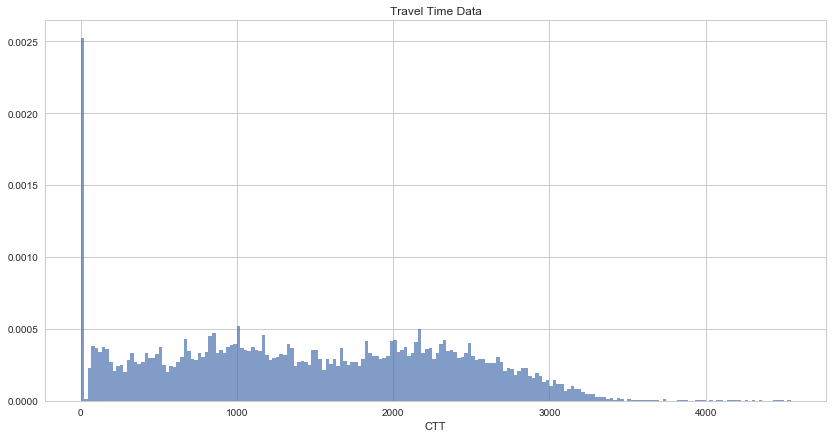

In [457]:
#spread of 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(14, 7))

plt.hist(target_train, bins=200, normed=True, alpha=0.7)

plt.xlabel("CTT")
plt.title('Travel Time Data');

In [458]:
print(numeric_variables, "\n \n", categorical_variables, "\n \n", features)

['StopSeq'] 
 
 ['Month', 'Hours', 'WeekDay', 'StopID'] 
 
 ['Year', 'Month', 'Hours', 'WeekDay', 'VehicleJourneyID', 'StopID', 'StopSeq']


In [459]:
# train_CTT = train.pop('Cumulative Time Taken')
# train_CTT.shape

In [460]:
# print("Training: X, y", len(train_X), len(test_X))
# print("Test: X, y", len(train_y), len(test_y))
# #print(len(X_train)) #, len(y_train), len(X_test), len(y_test))

# generate input dict + predict trip time for rfr

In [461]:
# columns = list(X_train[features_list])

In [462]:
# print(list(train_X[features]))

# X_train, X_test, y_train, y_test 

In [295]:
# X_train, X_test, y_train, y_test = train_test_split(features_train, target_train,  #no target, y only
#                                                     test_size = 0.3, random_state = 1)
# X_train.shape, X_test.shape

In [463]:
train_X, test_X, train_y, test_y = train_test_split(features_train, target_train, 
                                                    test_size = 0.2, random_state = 1)
train_X.shape, test_X.shape

((16534, 5), (4134, 5))

In [464]:
train_y.shape, test_y.shape

((16534, 1), (4134, 1))

In [465]:
regressor_list = []
ev_train = []
ev_test = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
mae_train = []
mae_test = []
mdae_train = []
mdae_test = []

In [466]:
#https://www.kaggle.com/olgabelitskaya/regressors
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train) #predictions for train, test sets
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

In [467]:
# RandomForestRegressor, AdaBoost, GradientBoostRegressor, BaggingRegressor
y_train_rfr, y_test_rfr = regression(RandomForestRegressor(), 
                                     train_X, test_X, train_y)

y_train_abr, y_test_abr = regression(AdaBoostRegressor(), 
                                     train_X, test_X, train_y)

y_train_gbr, y_test_gbr = regression(gBR(), 
                                     train_X, test_X, train_y)

y_train_br, y_test_br = regression(BaggingRegressor(), 
                                   train_X, test_X,  train_y)

C:\Users\Cara\Anaconda3\envs\summer_project_windows_1_0\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Cara\Anaconda3\envs\summer_project_windows_1_0\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Cara\Anaconda3\envs\summer_project_windows_1_0\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [468]:
scores(RandomForestRegressor(), train_y, test_y, y_train_rfr, y_test_rfr)
scores(AdaBoostRegressor(), train_y, test_y, y_train_abr, y_test_abr)
scores(gBR(), train_y, test_y, y_train_gbr, y_test_gbr)
scores(BaggingRegressor(), train_y, test_y, y_train_br, y_test_br)

______________________________________________________________________________
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
______________________________________________________________________________
EV score. Train:  0.96922047455
EV score. Test:  0.936198457501
---------
R2 score. Train:  0.969219134011
R2 score. Test:  0.936179312686
---------
MSE score. Train:  25491.8669115
MSE score. Test:  51810.7514657
---------
MAE score. Train:  108.2208033
MAE score. Test:  156.02703639
---------
MdAE score. Train:  70.5343452381
MdAE score. Test:  105.291666667
______________________________________________________________________________
AdaBoostRegressor(base_estimator=None, lear

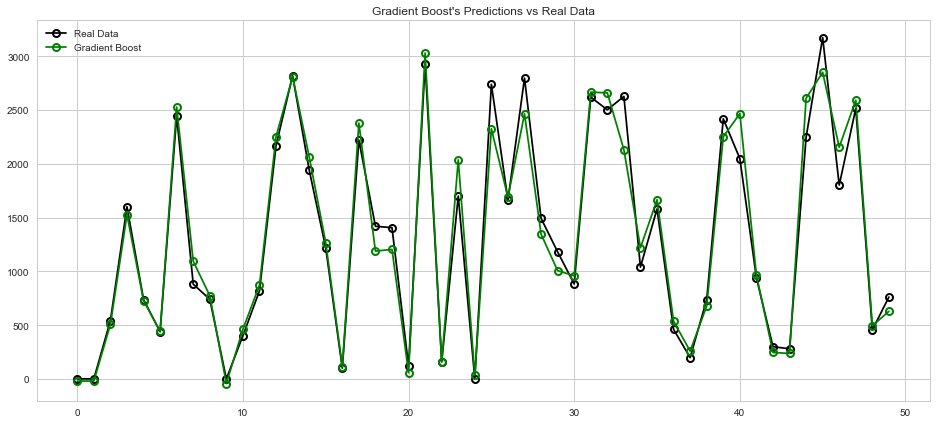

In [469]:
plt.figure(figsize = (16, 7))

plt.plot(test_y[0:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_gbr[0:50], '-o', color = 'green', label='Gradient Boost',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Gradient Boost's Predictions vs Real Data");

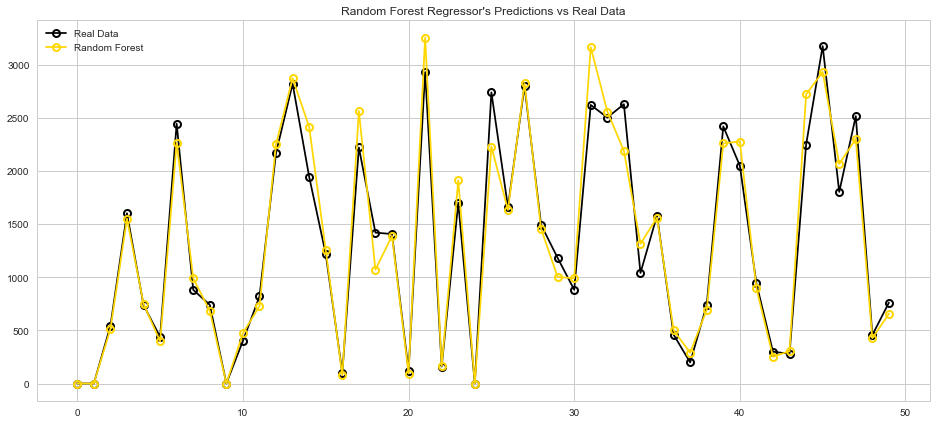

In [470]:
plt.figure(figsize = (16, 7))

plt.plot(test_y[0:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_rfr[0:50], '-o', color = 'gold', label='Random Forest',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Random Forest Regressor's Predictions vs Real Data");

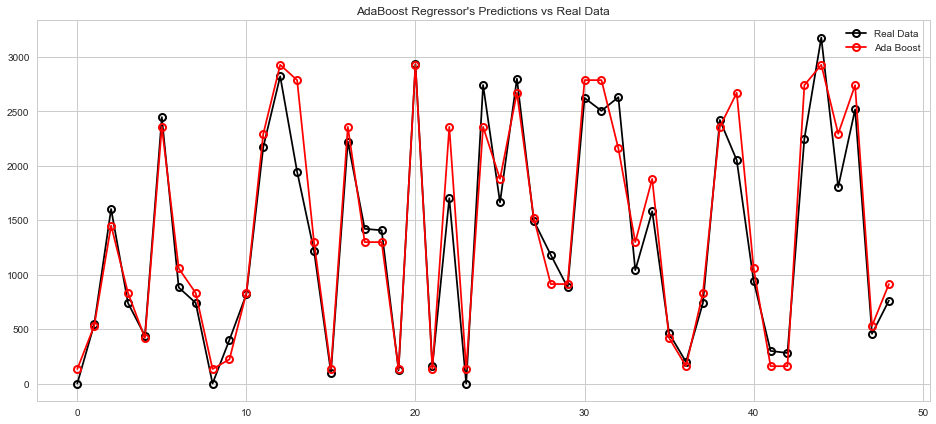

In [471]:
plt.figure(figsize = (16, 7))

plt.plot(y_test[1:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_abr[1:50], '-o', color = 'red', label='Ada Boost',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("AdaBoost Regressor's Predictions vs Real Data");

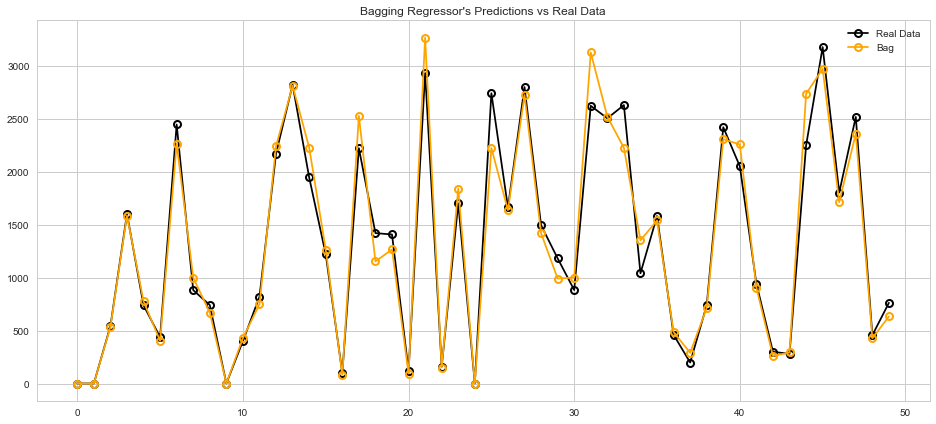

In [472]:
plt.figure(figsize = (16, 7))

plt.plot(y_test[0:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_br[0:50], '-o', color = 'orange', label='Bag',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Bagging Regressor's Predictions vs Real Data");

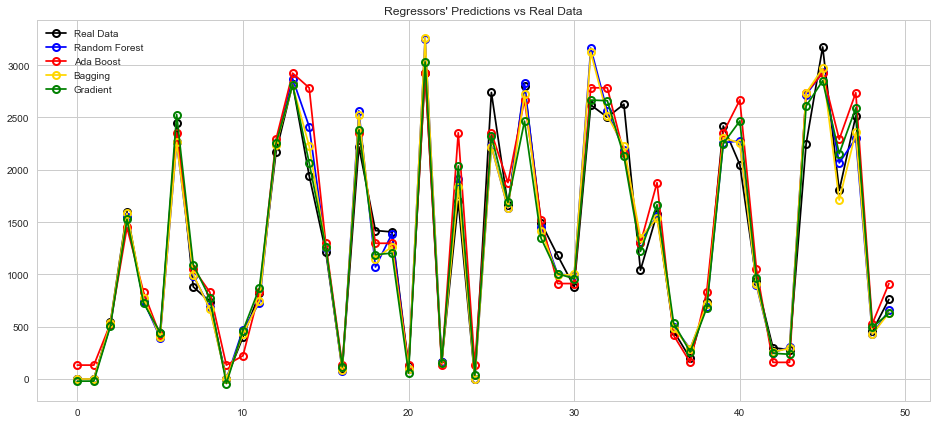

In [502]:
plt.figure(figsize = (16, 7))

plt.plot(y_test[0:50], '-o', color = 'black', label='Real Data',
         markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_rfr[0:50], '-o', color = 'blue', label='Random Forest',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_abr[0:50], '-o', color = 'red', label='Ada Boost',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_br[0:50], '-o', color = 'gold', label='Bagging',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.plot(y_test_gbr[0:50], '-o', color = 'green', label='Gradient',
        markersize=7, markerfacecolor="None", markeredgewidth=2)

plt.legend()
plt.title("Regressors' Predictions vs Real Data");

In [474]:
# #based on scoring, RFR performed best when predicting test set
# model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# model.fit(train_X[features_list], test_y)

# RFR Prediction

In [475]:
reg = RandomForestRegressor(max_depth=4, n_estimators=182, 
                                min_samples_leaf=50, min_samples_split=2)
reg.fit(features_train, target_train)

target_train_predict = reg.predict(features_train)
target_test_predict = reg.predict(features_test) #returns test y prediction

C:\Users\Cara\Anaconda3\envs\summer_project_windows_1_0\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [476]:
print(target_train_predict)
#print(target_train_predict[11])

[  1.37097439e+00   2.91149876e+02   2.98131422e+02 ...,   1.75186892e+03
   2.12764753e+03   2.13581507e+03]


In [501]:
print(len(target_train_predict))
print(len(target_test_predict))

20668
8859


In [478]:
print(len(target_predict))

8859


In [498]:
y_test.shape

(4134,)

In [492]:
import numpy
numpy.set_printoptions(threshold=numpy.nan)

In [493]:
# test_y.interpolate(axis=1).values.reshape(data.shape)

In [497]:
#reshape test_y
target_predict = ["{0:.2f}".format(x) for x in target_test_predict]

submission = pd.DataFrame({"Cumulative Time Taken": y_test, "Prediction_CTT": target_predict})
print(submission[0:10])


ValueError: arrays must all be same length

Further Work:
check out xgboost, ensembling, other regression models in scikit
run model for single day, week, single route
create ordered feature importance list from correlation section